## 0-1 Fun with Masked Arrays
Numpy masked arrays provide a way to keep track of elements that are considered "missing" or "bad". This is extremely useful when performing statistics on such arrays---masked elements should not be included in determining, for example the mean. Masked arrays are really helpful when combining images too that have known regions of bad or bogus data.
Check out the masked array methods and functions here: http://docs.scipy.org/doc/numpy/reference/routines.ma.html

The white dot and the hidden word are fixed with respect to each other but the light grey area hides a different part of the word in each image. You'll notice that the white dot has moved in each image.
In this exercise you'll use masked arrays to find a hidden word by combining a series of images. 

In [1]:
### ---------- Task 1 ----------- ####
# Using numpy tools, find the location of the center of the black dot in all five images (im1-a.png through im1-e.png) 
# and report those locations as a list of 5 tuples. 

In [2]:
%pylab inline
from scipy.ndimage import imread

Populating the interactive namespace from numpy and matplotlib


In [3]:
!pwd

/Users/farahshih/Documents/Codes/Python_For_Data_Science/Fu-Chi/Homework1


In [4]:
cd ~/Documents/Codes/Python_For_Data_Science/Kevin/Homework1/Data

/Users/farahshih/Documents/Codes/Python_For_Data_Science/Kevin/Homework1/Data


In [5]:
import scipy as sp

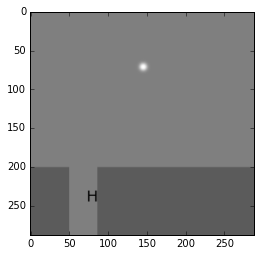

In [6]:
ima=imread("im1-a.png",flatten=True)
imshow(ima,cmap=cm.Greys)

In [7]:
ima.shape

(288, 288)

In [8]:
ima

array([[ 150.,  150.,  150., ...,  150.,  150.,  150.],
       [ 150.,  150.,  150., ...,  150.,  150.,  150.],
       [ 150.,  150.,  150., ...,  150.,  150.,  150.],
       ..., 
       [ 183.,  183.,  183., ...,  183.,  183.,  183.],
       [ 183.,  183.,  183., ...,  183.,  183.,  183.],
       [ 183.,  183.,  183., ...,  183.,  183.,  183.]], dtype=float32)

In [9]:
ima.argmin()

20592

In [10]:
def spot_finder(ime):
    tmp = ime.argmin()
    x = tmp//288  # quotient
    y = tmp%288  # remainder
    return([x, y])

In [11]:
spot_finder(ima)

[71, 144]

In [12]:
ima.max()

255.0

In [13]:
ima.min()

5.0

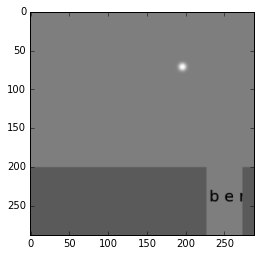

In [14]:
imb=imread("im1-b.png",flatten=True)
imshow(imb,cmap=cm.Greys)

In [15]:
spot_finder(imb)

[71, 195]

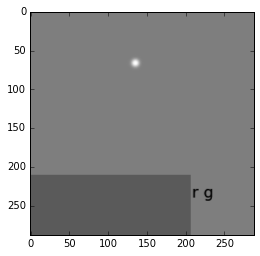

In [16]:
imc=imread("im1-c.png",flatten=True)
imshow(imc,cmap=cm.Greys)

In [17]:
spot_finder(imc)

[66, 134]

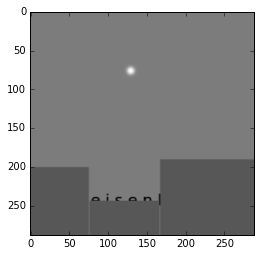

In [18]:
imd=imread("im1-d.png",flatten=True)
imshow(imd,cmap=cm.Greys)

In [19]:
spot_finder(imd)

[76, 128]

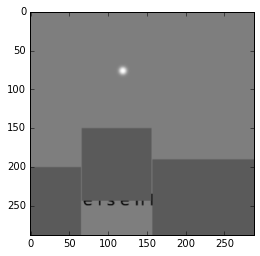

In [20]:
ime=imread("im1-e.png",flatten=True)
imshow(ime,cmap=cm.Greys)

In [21]:
spot_finder(ime)

[76, 118]

In [22]:
### ---------- Task 2 ------------- ###
# Using the location of the black dot in the first image, find the offset of the other images with respect to the 
# first image. Using scipy.ndimage.interpolation.shift perform a shift on the other four images such that they are 
# "registered" (aligned) with the first image. That is, make sure that the black dots are all in the same x,y location 
# in the transformed images. Keep those images in numpy arrays (for the next part) but also save those images as .png 
# files, appropriately named (im1-b-shift.png, im1-c-shift.png, etc.). Note: you'll need to think a bit about how you 
# treat the edges in the shift operation.

In [23]:
def offset(b):
    return(np.array(spot_finder(ima))-np.array(b))

In [24]:
offset(spot_finder(imb))

array([  0, -51])

In [25]:
offset(spot_finder(imd))

array([-5, 16])

In [26]:
sp.ndimage.interpolation.shift?

In [27]:
shifta = sp.ndimage.interpolation.shift(ima, offset(spot_finder(ima)))
shiftb = sp.ndimage.interpolation.shift(imb, offset(spot_finder(imb)))
shiftc = sp.ndimage.interpolation.shift(imc, offset(spot_finder(imc)))
shiftd = sp.ndimage.interpolation.shift(imd, offset(spot_finder(imd)))
shifte = sp.ndimage.interpolation.shift(ime, offset(spot_finder(ime)))

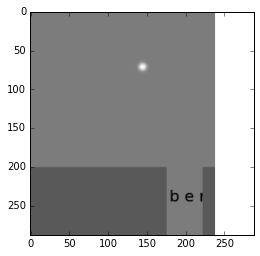

In [28]:
imshow(shiftb, cmap = cm.Greys)

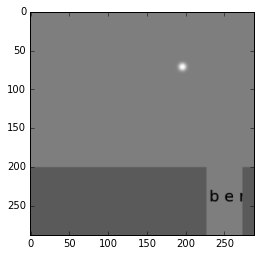

In [29]:
imshow(imb,cmap=cm.Greys)

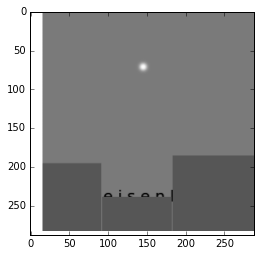

In [30]:
imshow(shiftd, cmap = cm.Greys)

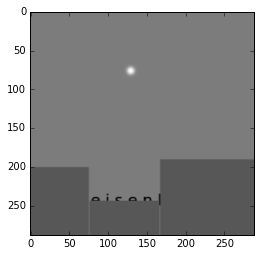

In [31]:
imshow(imd,cmap=cm.Greys)

In [32]:
####### ------------ Task3 ----------------- #####
# Mask out the registered images by finding an appropriate mask for the grey-level regions making 5 new masked arrays like:
# new_masked_a = ma.masked_array(ima,mask=mask)
# Combine the masked arrays using np.ma.median to reveal the hidden message.

In [33]:
shifta.max()

255.0

In [34]:
#np.set_printoptions(threshold=np.nan)

In [35]:
shifta

array([[ 150.,  150.,  150., ...,  150.,  150.,  150.],
       [ 150.,  150.,  150., ...,  150.,  150.,  150.],
       [ 150.,  150.,  150., ...,  150.,  150.,  150.],
       ..., 
       [ 183.,  183.,  183., ...,  183.,  183.,  183.],
       [ 183.,  183.,  183., ...,  183.,  183.,  183.],
       [ 183.,  183.,  183., ...,  183.,  183.,  183.]], dtype=float32)

In [36]:
ma.masked_array?

In [37]:
new_masked_a = ma.masked_array(shifta, mask = (shifta <=183))
new_masked_b = ma.masked_array(shiftb, mask = (shiftb <=183))
new_masked_c = ma.masked_array(shiftc, mask = (shiftc <=183))
new_masked_d = ma.masked_array(shiftd, mask = (shiftd <=183))
new_masked_e = ma.masked_array(shifte, mask = (shifte <=183))

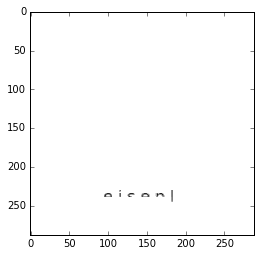

In [38]:
imshow(new_masked_d, cmap=cm.Greys)

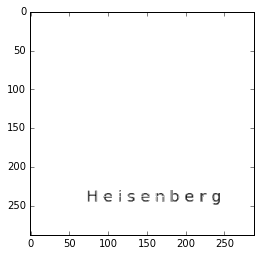

In [39]:
stacked = ma.array([new_masked_a,new_masked_b,new_masked_c,new_masked_d,new_masked_e])
imshow(np.ma.median(stacked, axis = 0),cmap=cm.Greys)